In [1]:
import numpy as np #import the numpy library to include the numbers
from sklearn.datasets import load_iris,load_breast_cancer #import the important datasets
from sklearn.model_selection import train_test_split,cross_val_score #import the fnction to split the dataset
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.metrics import classification_report #import the classification report to show accuracy and performance
from sklearn.tree import DecisionTreeClassifier #import decision tree
from sklearn.preprocessing import MinMaxScaler,StandardScaler #import the scaling function, standardscaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV #to get the best parameters, use Grid search
from sklearn.pipeline import Pipeline #to import the libraby of features
import pandas as pd #to show the data frames of the dataset


In [ ]:
X,y=load_breast_cancer(return_X_y=True) #here, we import the dataset of the breast cancer
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=42) #
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_rf_=rf.predict(X_test)
report=classification_report(y_test,y_rf_)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_rf=dt.predict(X_test)
report=classification_report(y_test,y_rf)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
scores=cross_val_score(rf,X_train,y_train,cv=5)

In [ ]:
scores

array([0.97802198, 0.95604396, 0.96703297, 0.93406593, 0.92307692])

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
params=[{'n_estimators':[2,4],
'max_features':[20,15]},]

In [ ]:
g=GridSearchCV(rf,params,cv=10, return_train_score=True,n_jobs=4)

In [ ]:
g.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid=[{'max_features': [20, 15], 'n_estimators': [2, 4]}],
             return_train_score=True)

In [ ]:
g.best_estimator_

RandomForestClassifier(max_features=20, n_estimators=4)

In [ ]:
g.best_params_

{'max_features': 20, 'n_estimators': 4}

In [ ]:
params=[{'n_estimators':[300,400,500],
'bootstrap':[False],
'max_features':[28,30]}]

In [ ]:
params=[{'n_estimators':[2,4],
'max_features':[20,15]},

{'n_estimators':[300,400,500],
'bootstrap':[False],
'max_features':[28,30]}]

In [ ]:
g=GridSearchCV(rf,params,cv=10, return_train_score=True,n_jobs=4)

In [ ]:
g.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid=[{'max_features': [20, 15], 'n_estimators': [2, 4]},
                         {'bootstrap': [False], 'max_features': [28, 30],
                          'n_estimators': [300, 400, 500]}],
             return_train_score=True)

In [ ]:
g.best_estimator_

RandomForestClassifier(max_features=20, n_estimators=4)

In [ ]:
g.best_params_

{'bootstrap': False, 'max_features': 28, 'n_estimators': 400}

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
ls=Lasso()
params=[{'alpha':[0.1, 0.2, 0.3]} ]

In [ ]:
g=GridSearchCV(ls,params,cv=10, return_train_score=True,n_jobs=4)

In [ ]:
g.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=4,
             param_grid=[{'alpha': [0.1, 0.2, 0.3]}], return_train_score=True)

In [ ]:
g.best_estimator_

Lasso(alpha=0.1)

In [ ]:
g.best_params_

{'alpha': 0.1}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
g.cv_results_

{'mean_fit_time': array([0.00885575, 0.00557215, 0.00490675, 0.00357127, 0.00466259,
        0.00446179]),
 'std_fit_time': array([0.00478524, 0.00510626, 0.00470284, 0.00243042, 0.00378995,
        0.00381236]),
 'mean_score_time': array([0.00621693, 0.00265732, 0.00289369, 0.00266888, 0.00198345,
        0.00161459]),
 'std_score_time': array([0.00433249, 0.00260744, 0.00484818, 0.00317446, 0.00209505,
        0.0011505 ]),
 'param_alpha': masked_array(data=[0.1, 0.2, 0.3, 0.5, 0.6, 0.4],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'alpha': 0.1},
  {'alpha': 0.2},
  {'alpha': 0.3},
  {'alpha': 0.5},
  {'alpha': 0.6},
  {'alpha': 0.4}],
 'split0_test_score': array([0.73689094, 0.73490162, 0.72597568, 0.69598011, 0.68587916,
        0.71290633]),
 'split1_test_score': array([0.55328164, 0.56624065, 0.57534036, 0.58465107, 0.58463476,
        0.58146923]),
 'split2_test_score': array([0.65091954, 0.6380193 , 0.62189957, 0.582216

In [ ]:
df = pd.DataFrame(g.cv_results_)

In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005508,0.003693,0.002877,0.002183,0.1,{'alpha': 0.1},0.736891,0.553282,0.650920,0.640050,...,0.663721,0.664023,0.668005,0.660388,0.659944,0.666884,0.669796,0.664486,0.664741,0.005056
1,0.007397,0.005685,0.002454,0.003081,0.2,{'alpha': 0.2},0.734902,0.566241,0.638019,0.625791,...,0.658007,0.658061,0.662062,0.653848,0.653699,0.661038,0.662216,0.657979,0.658370,0.005120
2,0.004303,0.003133,0.004438,0.004744,0.3,{'alpha': 0.3},0.725976,0.575340,0.621900,0.608375,...,0.648513,0.648601,0.651948,0.644446,0.643974,0.651239,0.650639,0.648188,0.648522,0.005049
3,0.005774,0.004649,0.006837,0.004470,0.5,{'alpha': 0.5},0.695980,0.584651,0.582216,0.563136,...,0.621105,0.619804,0.624226,0.614194,0.614772,0.622569,0.619180,0.618481,0.619130,0.005479
4,0.002732,0.000247,0.003317,0.004191,0.6,{'alpha': 0.6},0.685879,0.584635,0.556494,0.540000,...,0.602235,0.604420,0.606406,0.597720,0.599951,0.609627,0.596819,0.604119,0.602914,0.004784
5,0.003672,0.002115,0.003858,0.004241,0.4,{'alpha': 0.4},0.712906,0.581469,0.599877,0.587093,...,0.634781,0.635297,0.637771,0.631261,0.630320,0.637168,0.637487,0.634451,0.634939,0.005132


In [ ]:
dir(g)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [ ]:
g.best_estimator_

Lasso(alpha=0.1)

In [ ]:
g.best_params_

{'alpha': 0.1}

In [ ]:
g.best_score_

0.6388730319568238

In [ ]:
np.linspace(0.1,1,num=10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
p=Pipeline([
    ('scaler',MinMaxScaler()),
            ('estimator',RandomForestClassifier())])

In [ ]:
p.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', RandomForestClassifier())])

In [ ]:
from sklearn.datasets import _california_housing

In [ ]:
X,y=_california_housing.fetch_california_housing(return_X_y=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#import warnings
!pip install --upgrade category_encoders
from sklearn.ensemble import RandomForestClassifier
data = '/content/sample_data/car.data'

df = pd.read_csv(data, header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       

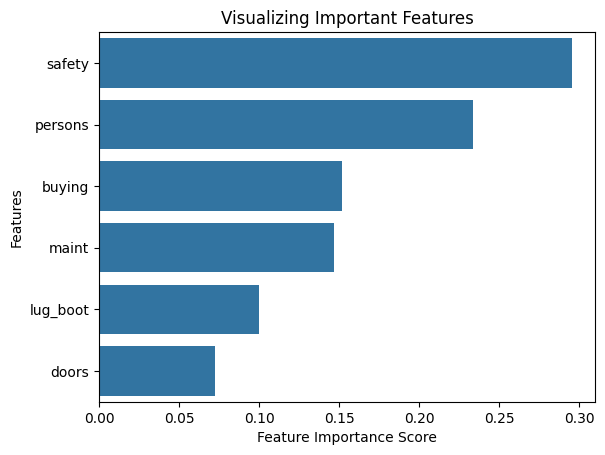

Model accuracy score with doors variable removed : 0.9264
Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]
              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#import warnings
!pip install --upgrade category_encoders
from sklearn.ensemble import RandomForestClassifier
data = '/content/sample_data/car.data'

df = pd.read_csv(data, header=None)

# view dimensions of dataset

df.shape
# preview the dataset

df.head()
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

# let's again preview the dataset

df.head()
df.info()
for col in col_names:
    print(df[col].value_counts())
df['class'].value_counts()
df.isnull().sum()
X = df.drop(['class'], axis=1)

y = df['class']

# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# check the shape of X_train and X_test

X_train.shape, X_test.shape
((1157, 6), (571, 6))

# check data types in X_train

X_train.dtypes

X_train.head()

# import category encoders

import category_encoders as ce
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

X_test.head()

# import Random Forest classifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)
# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))